<h1>Question 1</h1>

In [84]:
import numpy as np, random
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

1.The autoencoders can be used for generating new images like DALLE, Stable Diffusion, Midjourney and ... . By training on a dataset of images, autoencoders can learn to generate new, similar images. This has applications in art generation, data augmentation, and more.
. Furthermore, Autoencoders can be used to reconstruct clean data from noisy inputs. By training on noisy data and forcing the network to generate the original, noise-free data, autoencoders can effectively denoise information.

2.The latent space is the compressed representation of the input data in the autoencoder. If the latent space is too small or not expressive enough, it may not capture all the essential details of the input data, resulting in blurry reconstructions. The autoencoder struggles to represent the diversity and complexity of the original images within a limited latent space. To address blurriness in reconstructions, one can consider increasing the size of the latent space or using more advanced architectures

3.a)

In [85]:
from keras.datasets import mnist
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0

3.b)

In [86]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 1s 2ms/step


3.c)

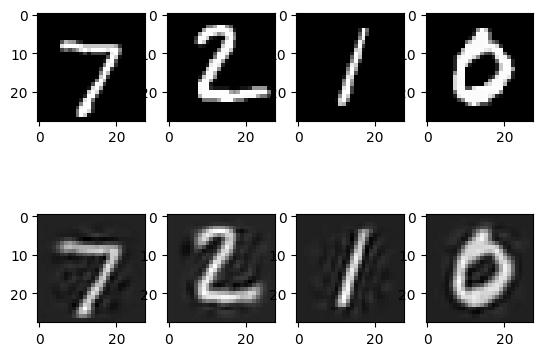

In [87]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(np.array(test_images[i]).reshape(28,28), cmap='gray', interpolation='none')
    plt.subplot(2, 4, i+5)
    plt.imshow(np.array(reconstructed_images[i]).reshape(28, 28), cmap='gray', interpolation='none')

3.d)

In [88]:
def MSE(output, input):
    error=0
    square_error=0
    mse=0
    for i in range(output.shape[0]):
        error=output[i]-input[i]
        square_error=error*error
        mse+=square_error
    return mse/output.shape[0]

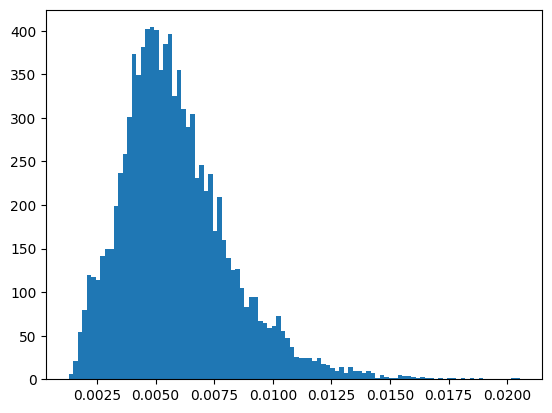

In [89]:
mses = np.array([MSE(test_images[i], reconstructed_images[i]) for i in range(reconstructed_images.shape[0])])
plt.hist(mses, bins=100)
plt.show()

3.e)

In [90]:
from scipy import stats
mean = mses.mean(axis=0)
std = mses.std(axis=0)
ks_statistic, p_value = stats.kstest(mses, cdf='norm', args=(mean, std))
p_value

4.5398099451431884e-43

Due to p-value being much smaller than 0.05 we can be almost sure that the MSE data does not follow a normal distribution.

<h1>Question 2</h1>

1.Outliers are data points that significantly deviate from the overall pattern of the data. These points can disproportionately influence the regression equation, pulling it in their direction.

TLeverage points are data points that have an extreme value in at least one of the independent variables. In other words, these points have values of the independent variables that are far from the mean of those variables.

Influential points are observations that have a significant impact on the regression equation. These points can exert influence by affecting the estimated coefficients and, consequently, the predictions of the model.

The presence of outliers, leverage points, or influential points can have negative effects on the regression model. They may lead to biased parameter estimates, increased variability in predictions, and reduced model interpretability.To mitigate the impact of these points, it is important to perform thorough data exploration, identify and understand the nature of these points, and consider appropriate strategies.

2.Coefficient of Determination indicates how well the independent variables explain the variability of the dependent variable. It helps to understand how well the independent variables account for the variations observed in the dependent variable.

In [91]:
def mean(x):
    sum=0
    for i in x:
        sum+=i
    return sum/len(x)

In [92]:
def cov(x,y):
    cov=0
    mean_x=mean(x)
    mean_y=mean(y)
    for i in range(len(x)):
        cov += (x[i]-mean_x)*(y[i]-mean_y)
    return cov/(len(x))

In [93]:
def Regression(x, y):
    a=cov(x,y)/cov(x,x)
    mean_y=mean(y)
    mean_x=mean(x)
    b = mean_y-a*mean_x
    ssr=0
    ssto=0
    for i in range(len(x)):
        ssr += (a*x[i]+b-mean_y)*(a*x[i]+b-mean_y)
        ssto += (y[i]-mean_y)*(y[i]-mean_y)
    r2=ssr/ssto
    return a,b,r2

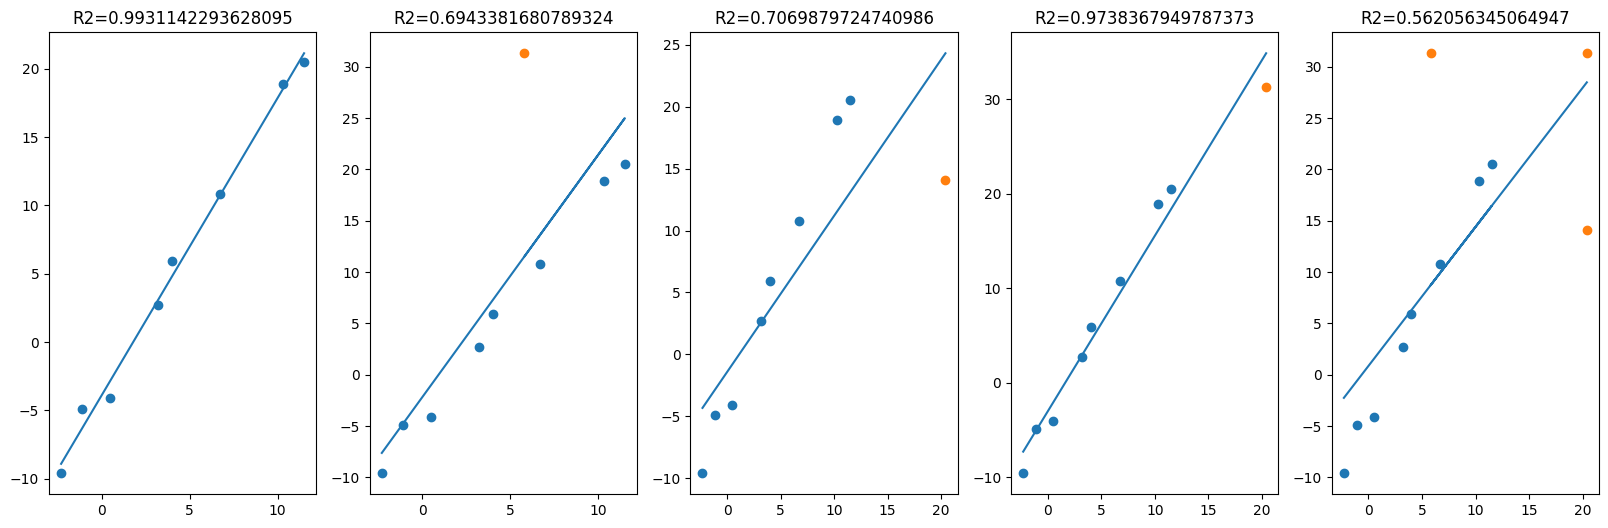

In [94]:
x=[-2.3, -1.1, 0.5, 3.2, 4.0, 6.7, 10.3, 11.5]
y=[-9.6, -4.9, -4.1, 2.7, 5.9, 10.8, 18.9, 20.5]
_x=[5.8, 20.4, 20.4]
_y=[31.3, 14.1, 31.3]
data_x = [[], [_x[0]], [_x[1]], [_x[2]], _x]
data_y = [[], [_y[0]], [_y[1]], [_y[2]], _y]
plt.figure(figsize=(20, 6))
for i in range(5):
    plt.subplot(1,5,i+1)
    a,b,r2=Regression(x+data_x[i], y+data_y[i])
    plt.scatter(x, y)
    plt.scatter(data_x[i], data_y[i])
    plt_y=[]
    for j in x+data_x[i]:
        plt_y.append(a*j+b)
    plt.plot(x+data_x[i], plt_y)
    plt.title(f"R2={r2}")
plt.show()

We can see in the third graph that although the point (20.4,31.3) is both an outliner and a high leverage point, it is not a potential outlier because it follows the trend and general pattern of other points.

4.The simplest alternative I can think of is not to include the points which are much greater or smaller than their previous and next points.

After googling, there are many other regression models like Theil–Sen estimator which defines the slope as median of all slopes calculated for each pair of points and other techniques for identifying and removing algorithms such as obust regression, quantile regression.


<h1>Question 3</h1>

In [95]:
import pandas as pd
df = pd.read_csv('FIFA2020.csv', encoding="ISO-8859-1")

1.Using pandas functions to clean data. There isn't a best solution for missing data we can replace N/As with 0, mean, median and ... but I've decided to replace them with medians.

In [96]:
df["pace"].fillna(df["pace"].median(), inplace=True)
df["dribbling"].fillna(df["dribbling"].median(), inplace=True)

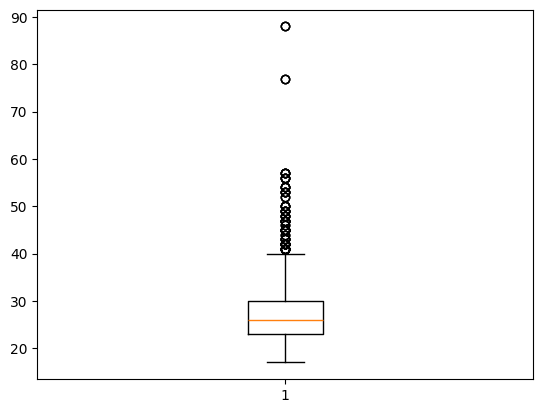

min=17, Q1=23.0, Q2=26.0, Q3=30.0, max=88


In [97]:
plt.boxplot(df["age"])
plt.show()
tdf=df["age"]
print(f"min={tdf.min()}, Q1={tdf.quantile(0.25)}, Q2={tdf.quantile(0.5)}, Q3={tdf.quantile(0.75)}, max={tdf.max()}")

2.Min: The youngest player

Q1: The age which one fourth of the players are younger than

Q2: The age which half of the players are younger than

Q3: The age which one fourth of the players are older than

max: The oldest

In [98]:
n=100
sample=df["weight"].sample(n)
mean=sample.mean()
var=sample.var()
std=sample.std()
print(f"mean={mean}, var={var}, std={std}")

mean=76.7, var=53.60606060606061, std=7.32161598324172


3.b) A Q-Q (quantile-quantile) plot is a graphical tool used in statistics to assess whether a dataset follows a particular theoretical distribution. It compares the quantiles of the observed data against the quantiles of a chosen theoretical distribution.

In [99]:
def validate_norm(sample):
    mean = sample.mean()
    var = sample.var()
    std = sample.std()
    print(f"mean={mean}, var={var}, std={std}")
    norm = np.random.normal(mean, std, sample.shape[0])
    norm.sort()
    sample.sort()
    plt.subplot(1, 2, 1)
    plt.scatter(norm, sample)
    plt.plot(np.arange(min(sample), max(sample)+1),
             np.arange(min(sample), max(sample)+1))
    statistic, p_value = stats.shapiro(sample)
    print(f"p_value={p_value}")
    plt.subplot(1, 2, 2)
    stats.probplot(sample, dist="norm", plot=plt)
    plt.show()

First I programmed the Q-Q plot myself then I plot it using scipy and the plots are the same except for a tranlation that moves the data around 0 on x axis.

mean=76.7, var=53.07, std=7.284915922644544
p_value=0.5503065586090088


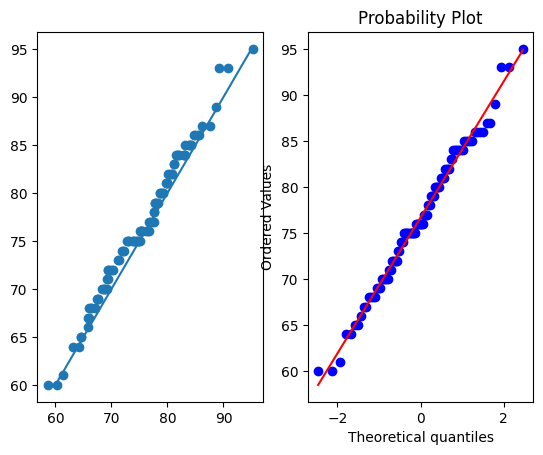

In [100]:
validate_norm(sample.to_numpy())

3.c) We can see that the points approximately lie on a line so the age of players probably follow a normal distribution and we can't reject the null hypothesis.

In [101]:
import scipy.stats as stats
statistic, p_value = stats.shapiro(sample)
p_value

0.5503065586090088

3.d) The p_value is much greater than 0.05 so the hypothesis that age of players follows the normal distribution is most likely true and we can't reject null hypothesis.

mean=75.914, var=48.162604, std=6.939928241703944
p_value=0.040010325610637665


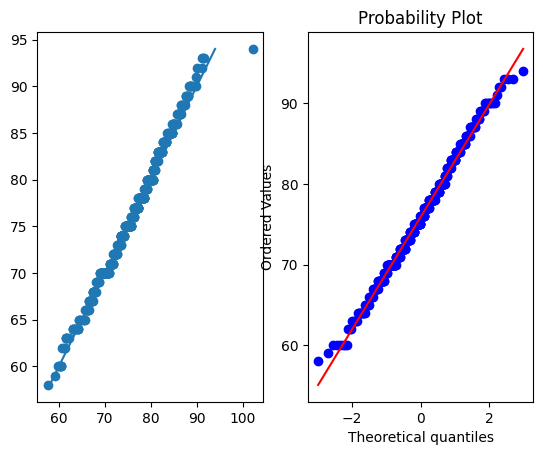

mean=75.4135, var=51.97751774999999, std=7.209543518836681
p_value=5.8684548776000156e-08


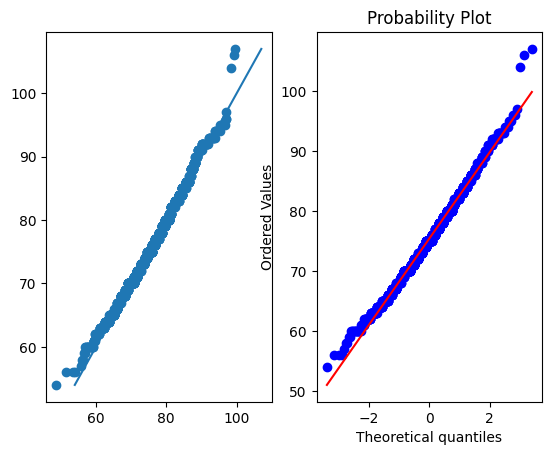

In [102]:
sample = df["weight"].sample(500)
validate_norm(sample.to_numpy())
sample = df["weight"].sample(2000)
validate_norm(sample.to_numpy())

3.e) We can see that by increasing the number of samples the p_value becomes much smaller than 0.05 but the line in Q-Q plot still exists so although with smaller n the p_value and the Q-Q plot both could not reject the null hypothesis now with larger n the p_value and Q-Q pot give different results so one of them is getting less accurate for larger n, based on CLT we can conclude that the p_value is the one geting less accurate.

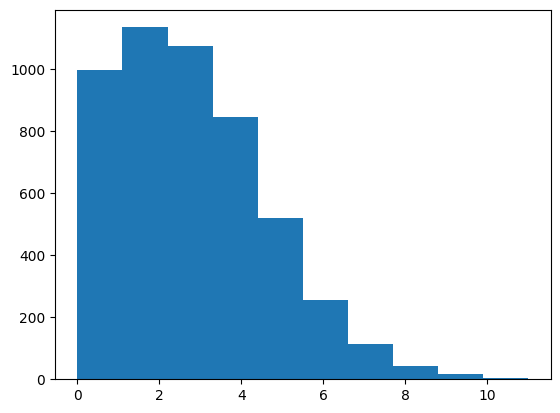

In [103]:
n=5000
lam=3
sample=np.random.poisson(lam,n)
plt.hist(sample, bins=10)
plt.show()

mean=3.4, var=1.44, std=1.2
p_value=0.20062334835529327


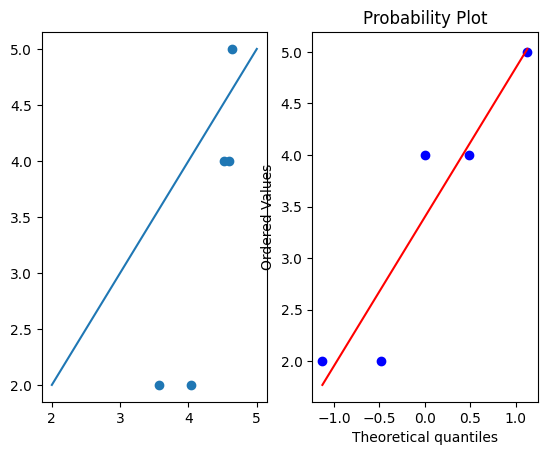

mean=2.924, var=2.594224, std=1.6106594922577522
p_value=5.023714083618458e-12


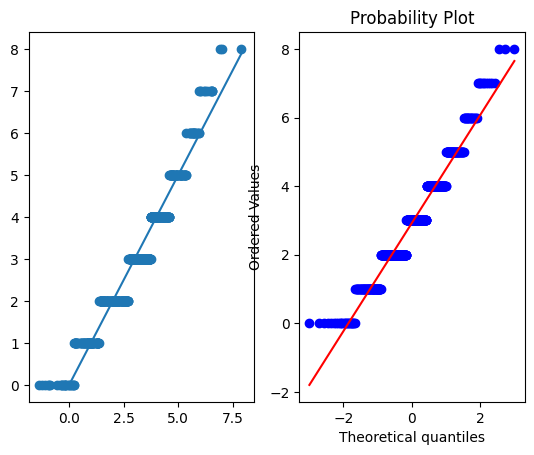

mean=3.0246, var=3.14599484, std=1.7736952500359244
p_value=3.966952077719311e-38


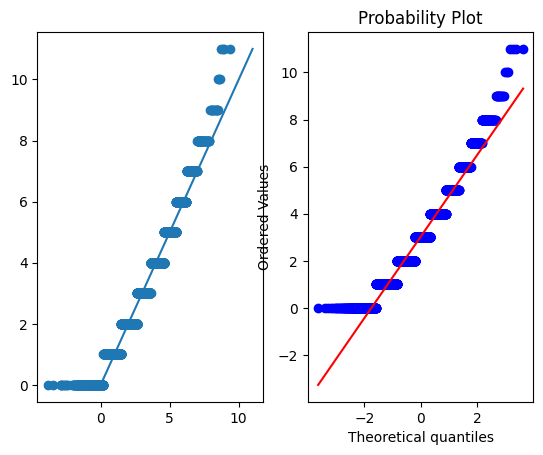

In [104]:
n = 5
lam = 3
sample = np.random.poisson(lam, n)
validate_norm(sample)
n = 500
sample = np.random.poisson(lam, n)
validate_norm(sample)
n = 5000
sample = np.random.poisson(lam, n)
validate_norm(sample)

From the Q-Q plot we can conclude that the data is normally distributed though from the p_value calculated from the Shapiro-Wilk test null hypothesis is rejected and there is evidence that the data tested are not normally distributed. From CLT we know that any sample of data large enough will tend to follow a normal distribution so we can see an example that the Shapiro-Wilk is not able to predict correctly and a reason for that may be "Like most statistical significance tests, if the sample size is sufficiently large this test may detect even trivial departures from the null hypothesis (i.e., although there may be some statistically significant effect, it may be too small to be of any practical significance); thus, additional investigation of the effect size is typically advisable, e.g., a Q–Q plot in this case." -from wikipedia.